**random sequence generator for toy distance calc**

In [3]:
from random import randint

In [4]:
randint?

**pdistance function : **

In [ ]:
def pdistance(seq1, seq2):
    p = 0
    pairs = []
    for x in zip(seq1,seq2):
        if '-' not in x: pairs.append(x)
    #for (x,y) in zip(seq1,seq2):
    for (x,y) in pairs:
        if x != y:
            p += 1
    #length = (len(seq1) + len(seq2)) / 2
    length = len(pairs)
    return float(p) / length

In [7]:
def genseq(seq_len):
    """the most simplest 
    random sequence generator"""
    nucs = ["A", "T", "G", "C"]
    seq = ""
    for i in range(0, seq_len):
        seq += nucs[randint(0,3)]
    return seq
        

In [84]:
a = genseq(10000)
b = genseq(10000)

**creating multiple alignment obj from the generated sequences**

In [85]:
from Bio import AlignIO
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord # dont't do from Bio import SeqRecord, it iport only module
from Bio.Alphabet import generic_dna

In [86]:
align = MultipleSeqAlignment([SeqRecord(Seq(a), id="a"),
                              SeqRecord(Seq(b), id="b")])
                                        

- here to find out distance we must take the lenght of the first sequence in the alignment

In [87]:
len(align[0, :])

10000

**NOTES : **
    - in AlignIO like with lists you can use slices out of range : it doesn't return an exception

In [88]:
window_size = 50
steps = len(align[0, :]) // window_size
print(steps)
start = 0
dist_container = []

for step in range(0, steps):
    finish = start + window_size + 1
    print("start: ", start, " finish: ", finish)
    seq1 = align[0, start:finish].seq
    print(seq1)
    seq2 = align[1, start:finish].seq
    print(seq2)   
    dist = pdistance(seq1, seq2)
    print(dist)
    dist_container.append(dist)
    print(dist_container)
    start = finish - 1
    print("-----------------")

200
start:  0  finish:  51
CATGAGTGGACTCTGCGGAGCCACCCTACAAGAGTCCTTCAATCAACGCGG
TTGAAGTACGCTAGGTAAACTAGCCTGATGGGGTTCACCTTCCCCATTCCT
0.6862745098039216
[0.6862745098039216]
-----------------
start:  50  finish:  101
GTGCGCATAGGAGAAGTTCTTATAGAAACGCATAATTTCCCTAGTTGCTCG
TCTAATTCCACCTAAGAAACGCAAGTGTGTCTAAGAAATGTCAGTCGCATG
0.7450980392156863
[0.6862745098039216, 0.7450980392156863]
-----------------
start:  100  finish:  151
GGGGCCAATGCGCCCAAGCCGGACTTGCCTCAAGACTCCTCTAGTCTAACG
GCTAGCATGACGTCACAGTCTCTTTTTGTAGTTCCTGGCGTCAGGCGACCC
0.6666666666666666
[0.6862745098039216, 0.7450980392156863, 0.6666666666666666]
-----------------
start:  150  finish:  201
GACCAACGCGTATGTCAGACTGGATGATTCGCCGATCATCAAAACAGACAT
CACCACAAACTACGTATATATGGGTCCTCTATCCCAGACGTAGTTCGGTCA
0.6666666666666666
[0.6862745098039216, 0.7450980392156863, 0.6666666666666666, 0.6666666666666666]
-----------------
start:  200  finish:  251
TCGTCTCGCGATAAGGCCCTCGGGGAAGTAGTATATATGGATCGAACCGGC
ACGGTACTTAGGAAGGGTTTCTTCATGACATAACTCCTCAGGAACGTTAT

0.7254901960784313
[0.6862745098039216, 0.7450980392156863, 0.6666666666666666, 0.6666666666666666, 0.7647058823529411, 0.7647058823529411, 0.8431372549019608, 0.7450980392156863, 0.7843137254901961, 0.8823529411764706, 0.803921568627451, 0.7843137254901961, 0.8627450980392157, 0.7254901960784313, 0.7843137254901961, 0.8235294117647058, 0.7254901960784313, 0.6078431372549019, 0.8431372549019608, 0.7058823529411765, 0.7843137254901961, 0.7254901960784313, 0.803921568627451, 0.7058823529411765, 0.8235294117647058, 0.7843137254901961, 0.7647058823529411, 0.7450980392156863, 0.8823529411764706, 0.6666666666666666, 0.8235294117647058, 0.7254901960784313, 0.7254901960784313, 0.6862745098039216, 0.803921568627451, 0.8235294117647058, 0.7254901960784313, 0.7647058823529411, 0.7843137254901961, 0.7254901960784313, 0.6666666666666666, 0.7647058823529411, 0.7254901960784313, 0.6470588235294118, 0.803921568627451, 0.7058823529411765, 0.7647058823529411, 0.7450980392156863, 0.7843137254901961, 0.68

In [89]:
dist_container

[0.6862745098039216,
 0.7450980392156863,
 0.6666666666666666,
 0.6666666666666666,
 0.7647058823529411,
 0.7647058823529411,
 0.8431372549019608,
 0.7450980392156863,
 0.7843137254901961,
 0.8823529411764706,
 0.803921568627451,
 0.7843137254901961,
 0.8627450980392157,
 0.7254901960784313,
 0.7843137254901961,
 0.8235294117647058,
 0.7254901960784313,
 0.6078431372549019,
 0.8431372549019608,
 0.7058823529411765,
 0.7843137254901961,
 0.7254901960784313,
 0.803921568627451,
 0.7058823529411765,
 0.8235294117647058,
 0.7843137254901961,
 0.7647058823529411,
 0.7450980392156863,
 0.8823529411764706,
 0.6666666666666666,
 0.8235294117647058,
 0.7254901960784313,
 0.7254901960784313,
 0.6862745098039216,
 0.803921568627451,
 0.8235294117647058,
 0.7254901960784313,
 0.7647058823529411,
 0.7843137254901961,
 0.7254901960784313,
 0.6666666666666666,
 0.7647058823529411,
 0.7254901960784313,
 0.6470588235294118,
 0.803921568627451,
 0.7058823529411765,
 0.7647058823529411,
 0.74509803921568

In [90]:
import matplotlib.pyplot as plt

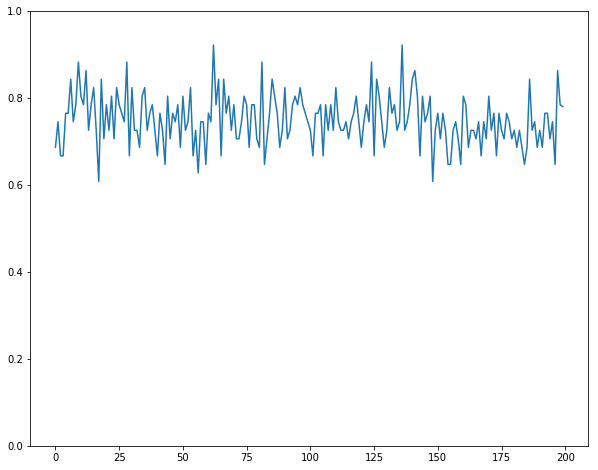

In [93]:
fig = plt.figure(figsize=(10, 8))
plt.plot(dist_container)

plt.ylim(0, 1)
plt.show()